Stroke Data Results
The stroke dataset has 5110 rows and 12 columns. The cleaning function in template is called to change columns to numeric. The bmi column has missing values which are filled by linear interpolation and un-necessary columns are deleted.
•	The heatmap of correlation shows that the correlation among features is not so high.
•	t-stats for equality of mean of all numeric columns suggest that mean of numeric columns are not equal
•	the Chi-square statistics suggest that numeric columns are not linearly independent 
•	The data of numeric columns is not normal.
The one hot encoding is applied to string columns to create dummies, which results in 
Rows=5110, and columns= 22)

Machine Learning algorithms are applied in two stages.
1.	In the first sage the issue of class imbalance is not addressed. Eleven different machine learning classification algorithms are applied and four different scenarios are considered
a.	without focusing the cross validation (CV) and features selection.
b.	Only cross validation (CV: Stratified K-Fold) is considered
c.	Only feature selection (random forest based algorithm is used) criterion is considered
d.	Both cross validation (CV: Stratified K-Fold) and features selection (random forest based algorithm is used) are considered.
The results of this stage indicate that
•	With the application of CV the precision and accuracy increase in comparison to the bench mark category which is (without CV and RFFS)
•	The performance in terms all four criterions (precision, recall, AUC and accuracy) worsens with the application of features selection criterion in comparison to the benchmark category
•	The final Selected Features are ['avg_glucose_level', 'age', 'bmi', 'hypertension']
Indicating that categorical variables do not play any role.
•	With the application of both CV and RFFS criterions, almost all 11 algorithms outperform the benchmark as well as the other two categories.
•	 The best performing algorithm seems to be the Random Forest. The performance of all remaining algorithms is considerably worse.

2.	In the second stage the class imbalance issue is resolved through SMOT oversampling (to increase the under sampled category which is stroke=1). The results show that 

Original data shape: (5110, 22)
Resampled data shape: (9722, 22)
The above four different scenarios are considered
a.	without focusing the cross validation (CV) and features selection.
b.	Only cross validation (CV: Stratified K-Fold) is considered
c.	Only feature selection (random forest based algorithm is used) criterion is considered
d.	Both cross validation (CV: Stratified K-Fold) and features selection (random forest based algorithm is used) are considered.
The results of this stage indicate that
•	With the application of CV the precision and accuracy increase in comparison to the bench mark category which is (without CV and RFFS)
•	The performance in terms all four criterions (precision, recall, AUC and accuracy) worsens a little bit with the application of features selection criterion in comparison to the benchmark category
•	Selected Features are =['age', 'avg_glucose_level', 'smoking_status_Unknown', 'smoking_status_never smoked', 'bmi', 'smoking_status_formerly smoked', 'Residence_type_Urban', 'ever_married_No', 'Residence_type_Rural', 'smoking_status_smokes', 'work_type_Private', 'work_type_Govt_job', 'work_type_Self-employed']

•	With the application of both CV and RFFS criterions, almost all 11 algorithms underperform than the CV only based scenario but outperform the rest of two scenarios.
•	 The best performing algorithm seems to be the Random Forest.


Overall it seems that 
•	With the application of SMOT oversampling the performance improves in comparison to the strategy of without addressing the class imbalancing issue.
•	The Random forest outperforms all the remaining algorithms.



In [1]:
import TempML1 as template
from sklearn.model_selection import train_test_split

In [2]:
FILE_NAME = "health.csv"
LABEL_COL = "stroke"
healthdf = template.load_data(FILE_NAME)
display(healthdf.head())
print(healthdf.shape)
print(healthdf.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


(5110, 12)
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [3]:
healthdf.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
healthdf = template.cleaningup(healthdf, to_numeric=["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"], cols_to_interpolate=["bmi"], cols_to_delete=["id"])

df is all cleaned up..


In [5]:
print(healthdf.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Shape is:
 (5110, 11)

 Columns are:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 Types are:
 gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

 Statistical Analysis of Numerical Columns:
                age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000    

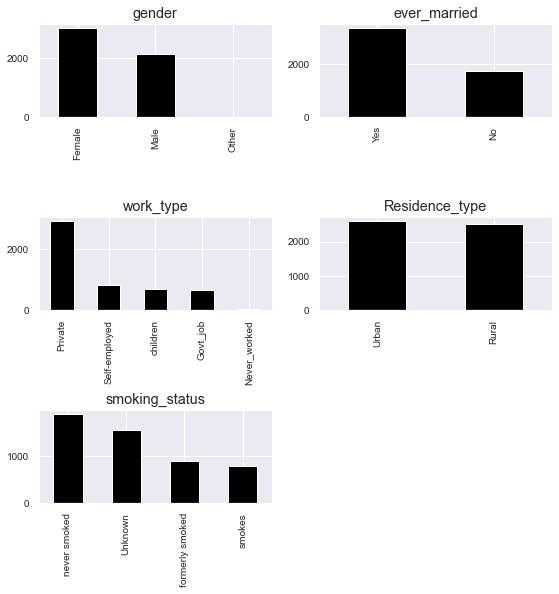

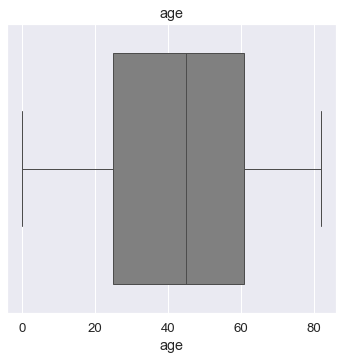

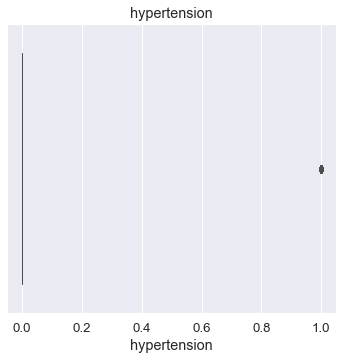

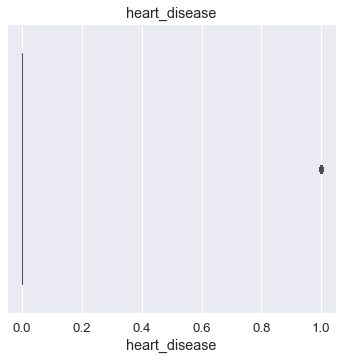

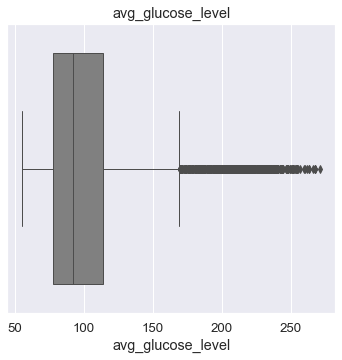

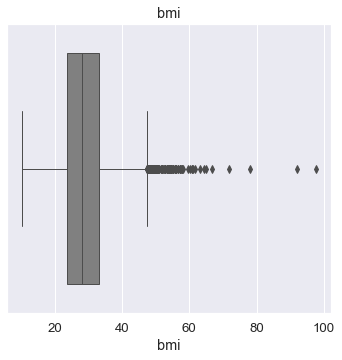

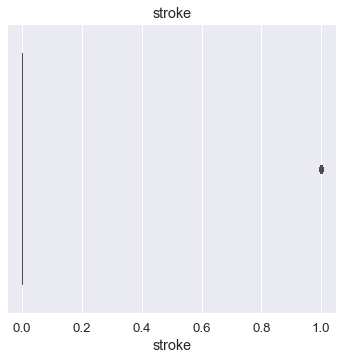

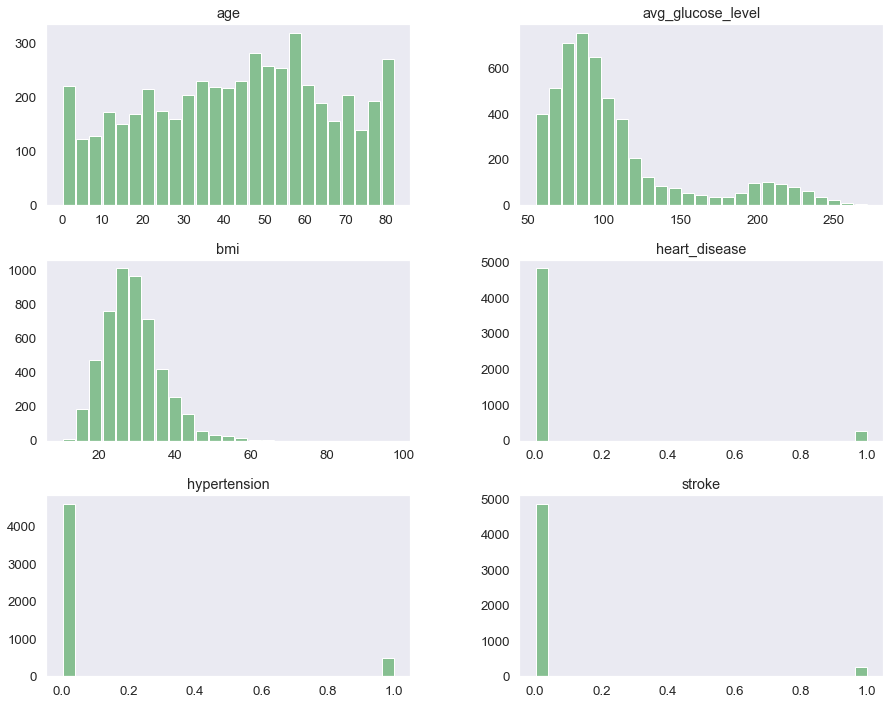

In [6]:
template.basicanalysis(healthdf)
template.stringcolanalysis(healthdf)
template.numcolanalysis(healthdf)

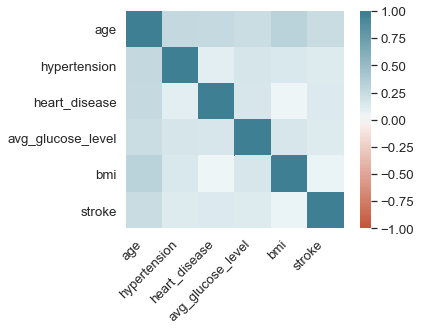

In [9]:
template.correlation_anlysis(healthdf)

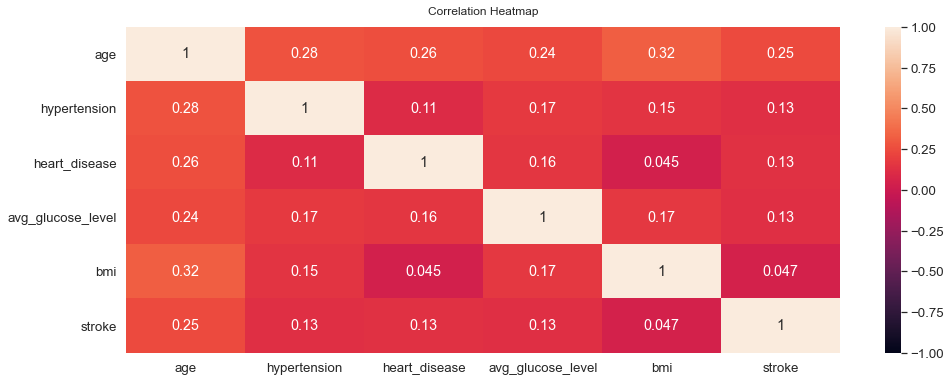

In [10]:
template.correlation(healthdf)

In [11]:
template.t_test(healthdf)


t-test for equality of mean between all numric columns
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
(age,hypertension) => t-value=136.3303908087598, p-value=0.0
(age,heart_disease) => t-value=136.4726367422864, p-value=0.0
(age,avg_glucose_level) => t-value=-88.86334306898064, p-value=0.0
(age,bmi) => t-value=42.747335654349925, p-value=0.0
(age,stroke) => t-value=136.48997200146383, p-value=0.0
(hypertension,heart_disease) => t-value=8.327414713584083, p-value=9.320689203295453e-17
(hypertension,avg_glucose_level) => t-value=-167.40643548416358, p-value=0.0
(hypertension,bmi) => t-value=-264.86157791968265, p-value=0.0
(hypertension,stroke) => t-value=9.503622984959767, p-value=2.4828630276395242e-21
(heart_disease,avg_glucose_level) => t-value=-167.47652032737852, p-value=0.0
(heart_disease,bmi) => t-value=-265.3415120442796, p-value=0.0
(heart_disease,stroke) => t-value=1.2098297457356277, p-value=0.22637221796027784
(avg_glucose_level,bmi) => t-val

In [12]:
template.Normality_test(healthdf)


Normality Test for all numric columns
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Normaility Test for Column: age
Statistics=0.967, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: hypertension
Statistics=0.337, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: heart_disease
Statistics=0.235, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: avg_glucose_level
Statistics=0.806, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: bmi
Statistics=0.955, p_value=0.000
Sample does not look Gaussian (reject H0)
Normaility Test for Column: stroke
Statistics=0.220, p_value=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
template.ANOVA_analysis(healthdf)


In [13]:
template.chisquare_test(healthdf)

Chisquare-test for Independence between all numric columns
(age,hypertension) => chisqr-value=496.4441285756874, p-value=7.950648916458542e-53
Dependent (reject H0)
(age,heart_disease) => chisqr-value=544.6187743416522, p-value=2.8909739686706094e-61
Dependent (reject H0)
(age,avg_glucose_level) => chisqr-value=407657.6752319793, p-value=0.9891852058214933
Independent (H0 holds true)
(age,bmi) => chisqr-value=64611.62085993603, p-value=6.162068063170742e-225
Dependent (reject H0)
(age,stroke) => chisqr-value=491.7477217460024, p-value=5.161745862440517e-52
Dependent (reject H0)
(hypertension,heart_disease) => chisqr-value=58.336663503559144, p-value=2.208889768960281e-14
Dependent (reject H0)
(hypertension,avg_glucose_level) => chisqr-value=4182.856144874379, p-value=0.011730353829931574
Dependent (reject H0)
(hypertension,bmi) => chisqr-value=869.1713858592308, p-value=4.2833310152885746e-20
Dependent (reject H0)
(hypertension,stroke) => chisqr-value=81.6053682482931, p-value=1.661621

In [14]:
healthdf = template.onehotencoding(healthdf)

In [15]:
healthdf.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [16]:
healthdf['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# Transformation

In [ ]:
#healthdf=template.MinMax_Transformation(healthdf,'stroke')
#healthdf=template.Standard_Transformation(healthdf,'stroke')
healthdf

# Without Addressing Class Imbalancing

In [17]:
#without REG, CV and RFFS and addressing class imbalancing
results_without_cv_reg_rffs= template.run_algorithms(healthdf,"stroke")

============ LogReg ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.71624266144813

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[968   0]
 [ 54   0]]

============ KNN ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 93.63992172211351

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.4943181818181818

 F-Score:
 0.0

 Confusion Matrix: 
 [[957  11]
 [ 54   0]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.32485322896281

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.49793388429752067

 F-Score:
 0.0

 Confusion Matrix: 
 [[964   4]
 [ 54   0]]

============ AdaBoost ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.32485322896281

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.49793388429752067

 F

In [18]:
#with CV only and without addressing class imbalancing
results_cv = template.run_algorithms_cv(healthdf,"stroke")

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 224, number of negative: 4375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 4599, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048706 -> initscore=-2.972016
[LightGBM] [Info] Start training from score -2.972016
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 224, number of negative: 4375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 4599, number of used fea

[22:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 224, number of negative: 4375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data p

In [19]:
#with RFFS only and without addressing class imbalancing
res_rffs = template.MachineLearningwithRFFS(healthdf, "stroke", threshold=3,
                                    algo_list=template.get_supported_algorithms())

avg_glucose_level                 25.849836
age                               24.401399
bmi                               23.514942
hypertension                       3.160500
heart_disease                      2.480187
smoking_status_formerly smoked     2.061502
gender_Female                      1.964351
Residence_type_Urban               1.855011
work_type_Private                  1.830559
smoking_status_smokes              1.817578
Residence_type_Rural               1.795672
work_type_Self-employed            1.659606
smoking_status_never smoked        1.658442
gender_Male                        1.603758
smoking_status_Unknown             1.316346
work_type_Govt_job                 1.122081
ever_married_No                    1.105450
ever_married_Yes                   0.745560
work_type_children                 0.057221
gender_Other                       0.000000
work_type_Never_worked             0.000000
dtype: float64
Selected Features =['avg_glucose_level', 'age', 'bmi', 'hyper

In [20]:
#with CV and RFFS and without addressing class imbalancing
res_rffs_cv = template.MachineLearningwithRFFS_CV(healthdf, "stroke", threshold=3,
                                    algo_list=template.get_supported_algorithms())

avg_glucose_level                 26.391147
age                               24.368483
bmi                               23.876272
heart_disease                      2.855841
hypertension                       2.466052
work_type_Private                  2.339199
smoking_status_never smoked        2.031167
Residence_type_Rural               1.854332
gender_Male                        1.817449
work_type_Govt_job                 1.663745
smoking_status_Unknown             1.601939
smoking_status_formerly smoked     1.591068
Residence_type_Urban               1.578195
work_type_Self-employed            1.478487
gender_Female                      1.401500
smoking_status_smokes              1.033946
ever_married_No                    0.895476
ever_married_Yes                   0.675886
work_type_children                 0.079815
work_type_Never_worked             0.000000
gender_Other                       0.000000
dtype: float64
Selected Features =['avg_glucose_level', 'age', 'bmi']
(5110,

[22:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Info] Number of positive: 224, number of negative: 4375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 4599, number of used features: 3
[LightGBM] [Info] [bina

In [21]:
#all results without addressing class imbalancing
res_all=template.all_CImbalance(healthdf, 'stroke', algo_list=template.get_supported_algorithms(), threshold=5, feature_list=[]) 


Results without FS, REG and CV
============ LogReg ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.71624266144813

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[968   0]
 [ 54   0]]

============ KNN ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 93.63992172211351

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.4943181818181818

 F-Score:
 0.0

 Confusion Matrix: 
 [[957  11]
 [ 54   0]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.32485322896281

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.49793388429752067

 F-Score:
 0.0

 Confusion Matrix: 
 [[964   4]
 [ 54   0]]

============ AdaBoost ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.32485322896281

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0



Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 94.71624266144813

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[968   0]
 [ 54   0]]

============ LightGbm ===========
[LightGBM] [Info] Number of positive: 195, number of negative: 3893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047701 -> initscore=-2.993936
[LightGBM] [Info] Start training from score -2.993936
Prediction Vector: 
 [0. 0. 0. ... 0. 0. 0.]

 Accuracy: 
 94.71624266144813

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[968   0]
 [ 54   0]]

============ XgBoost ==========

[22:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225, number of negative: 4374
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 4599, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048924 -> initscore=-2.967333
[LightGBM] [Info] Start training from score -2.967333
============ LogReg ===========
{'accuracy': 95.14677103718199, 'precision': 10.0, 'recall': 0.4, 'auc_val': 0.502, 'f_score': 0.007692307692307693}

============ KNN ===========
{'accuracy': 94.30528375733857, 'precision': 7.392857142857143, 'recall': 2.4, 'auc_val': 0.5070632071724931, 'f_score': 0.03477855477855478}

============ GadientBoosting ===========
{'accuracy': 94.87279843444227, 'precision': 15.0, 'recall': 0.8,

[22:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

TypeError: unhashable type: 'dict'

#  With Adressing Class Imbalancing

In [22]:
#deep copy
healthdf_bal1 = healthdf.copy()

In [23]:
healthdf_bal=template.SMOT_OverSampling(healthdf_bal1, 'stroke')

In [24]:
healthdf_bal

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.000000,0,1,228.690000,36.600000,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,61.000000,0,0,202.210000,34.550000,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2,80.000000,0,1,105.920000,32.500000,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,49.000000,0,0,171.230000,34.400000,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,79.000000,1,0,174.120000,24.000000,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,75.334024,0,0,98.331220,24.506100,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
9718,76.207089,1,0,195.502774,27.207089,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
9719,59.421686,0,0,106.227501,37.693675,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
9720,79.016641,0,0,67.920318,24.396672,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [25]:
print('Orignal data shape:', healthdf.shape)
print('Resampled data shape:', healthdf_bal.shape)



Orignal data shape: (5110, 22)
Resampled data shape: (9722, 22)


In [26]:
#without REG, CV and RFFS and with addressing class imbalancing
results_without_cv_rffs = template.run_algorithms(healthdf_bal,"stroke")



============ LogReg ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 94.44730077120823

 Precision of event Happening: 
 95.5832389580974

 Recall of event Happening: 
 92.44249726177436

 AUC: 
 0.9433171374716627

 F-Score:
 0.9398663697104678

 Confusion Matrix: 
 [[993  39]
 [ 69 844]]

============ KNN ===========
Prediction Vector: 
 [1 1 0 ... 0 1 1]

 Accuracy: 
 89.30591259640103

 Precision of event Happening: 
 82.48847926267281

 Recall of event Happening: 
 98.02847754654984

 AUC: 
 0.8980881241668576

 F-Score:
 0.8958958958958958

 Confusion Matrix: 
 [[842 190]
 [ 18 895]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 96.09254498714654

 Precision of event Happening: 
 98.15880322209436

 Recall of event Happening: 
 93.42825848849945

 AUC: 
 0.9593893544580011

 F-Score:
 0.957351290684624

 Confusion Matrix: 
 [[1016   16]
 [  60  853]]

============ AdaBoost ===========
Prediction Vector: 
 [1 1 0 ...

In [27]:
#with CV only and with addressing class imbalancing
results_cv = template.run_algorithms_cv(healthdf_bal,"stroke")



[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4374, number of negative: 4375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 8749, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499943 -> initscore=-0.000229
[LightGBM] [Info] Start training from score -0.000229
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4375, number of negative: 4374
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

[00:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4374, number of negative: 4375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

In [28]:
#with RFFS and with addressing class imbalancing
res_rffs = template.MachineLearningwithRFFS(healthdf_bal, "stroke", threshold=3,
                                    algo_list=template.get_supported_algorithms())



age                               21.591726
avg_glucose_level                 11.217293
smoking_status_Unknown             7.323820
smoking_status_never smoked        6.778809
bmi                                6.340713
smoking_status_formerly smoked     5.747886
Residence_type_Urban               5.579414
ever_married_No                    4.813318
Residence_type_Rural               4.320363
smoking_status_smokes              4.220367
work_type_Private                  4.201768
work_type_Govt_job                 4.036544
work_type_Self-employed            3.814539
gender_Female                      2.988225
gender_Male                        2.417544
work_type_children                 1.750612
ever_married_Yes                   1.230507
hypertension                       0.942630
heart_disease                      0.666329
work_type_Never_worked             0.017593
gender_Other                       0.000000
dtype: float64
Selected Features =['age', 'avg_glucose_level', 'smoking_stat

In [29]:
#with CV and RFFS and with addressing class imbalancing
res_rffs_cv = template.MachineLearningwithRFFS_CV(healthdf_bal, "stroke", threshold=3,
                                    algo_list=template.get_supported_algorithms())



age                               25.476969
avg_glucose_level                 10.329728
bmi                                7.788486
ever_married_No                    7.048733
smoking_status_Unknown             5.730555
Residence_type_Rural               4.709759
smoking_status_never smoked        4.558360
Residence_type_Urban               4.522343
gender_Male                        4.289824
gender_Female                      4.052390
ever_married_Yes                   3.466547
smoking_status_smokes              3.309691
work_type_Private                  3.277874
work_type_Govt_job                 3.135808
work_type_Self-employed            2.773439
smoking_status_formerly smoked     2.752935
hypertension                       0.976782
work_type_children                 0.956480
heart_disease                      0.816478
work_type_Never_worked             0.021306
gender_Other                       0.005513
dtype: float64
Selected Features =['age', 'avg_glucose_level', 'bmi', 'ever_

[00:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [30]:
#all results and with addressing class imbalancing
res_all=template.all_CImbalance(healthdf_bal, 'stroke', algo_list=template.get_supported_algorithms(), threshold=5, feature_list=[]) 


Results without FS, REG and CV
============ LogReg ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 94.44730077120823

 Precision of event Happening: 
 95.5832389580974

 Recall of event Happening: 
 92.44249726177436

 AUC: 
 0.9433171374716627

 F-Score:
 0.9398663697104678

 Confusion Matrix: 
 [[993  39]
 [ 69 844]]

============ KNN ===========
Prediction Vector: 
 [1 1 0 ... 0 1 1]

 Accuracy: 
 89.30591259640103

 Precision of event Happening: 
 82.48847926267281

 Recall of event Happening: 
 98.02847754654984

 AUC: 
 0.8980881241668576

 F-Score:
 0.8958958958958958

 Confusion Matrix: 
 [[842 190]
 [ 18 895]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 96.09254498714654

 Precision of event Happening: 
 98.15880322209436

 Recall of event Happening: 
 93.42825848849945

 AUC: 
 0.9593893544580011

 F-Score:
 0.957351290684624

 Confusion Matrix: 
 [[1016   16]
 [  60  853]]

============ AdaBoost ===========


Prediction Vector: 
 [1 1 0 ... 0 1 1]

 Accuracy: 
 77.9948586118252

 Precision of event Happening: 
 73.0732635585157

 Recall of event Happening: 
 84.118291347207

 AUC: 
 0.7834790536352598

 F-Score:
 0.7820773930753565

 Confusion Matrix: 
 [[749 283]
 [145 768]]

============ DecisionTree ===========
Prediction Vector: 
 [0 1 0 ... 0 1 1]

 Accuracy: 
 87.96915167095116

 Precision of event Happening: 
 86.15548455804047

 Recall of event Happening: 
 88.60898138006573

 AUC: 
 0.8800604107762976

 F-Score:
 0.8736501079913608

 Confusion Matrix: 
 [[902 130]
 [104 809]]

============ RandomForest ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 90.8483290488432

 Precision of event Happening: 
 87.92569659442725

 Recall of event Happening: 
 93.31872946330778

 AUC: 
 0.909907600804911

 F-Score:
 0.9054197662061637

 Confusion Matrix: 
 [[915 117]
 [ 61 852]]

============ NaiveBayes ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 76.5038560

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4375, number of negative: 4375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 8750, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4375, number of negative: 4375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightG

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4375, number of negative: 4375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 8750, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4375, number of negative: 4375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightG

[LightGBM] [Info] Number of positive: 4375, number of negative: 4375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 8750, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4375, number of negative: 4375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 8750, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[00:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.

============ LogReg ===========
{'accuracy': 77.24773620257233, 'precision': 74.74108229758006, 'recall': 82.35079135717967, 'auc_val': 0.772482275796216, 'f_score': 0.783398933941712}

============ KNN ===========
{'accuracy': 89.4978514542863, 'precision': 84.43985790575124, 'recall': 96.87306174529537, 'auc_val': 0.8949755367962074, 'f_score': 0.9022506344677508}

============ GadientBoosting ===========
{'accuracy': 84.55122674347294, 'precision': 81.13990819720512, 'recall': 89.984493962363, 'auc_val': 0.8455224731918776, 'f_score': 0.852816307558745}

============ AdaBoost ===========
{'accuracy': 79.4799398576377, 'precision': 76.16146708352248, 'recall': 85.84848023930844, 'auc_val': 0.7948063224072807, 'f_score': 0.8068304461014458}

============ SVM ===========
{'accuracy': 76.3835809659151, 'precision': 74.18510639525172, 'recall': 80.99242865955163, 'auc_val': 0.7638388217101426, 'f_score': 0.7742010793357995}

============ DecisionTree ===========
{'accuracy': 91.103212667

TypeError: unhashable type: 'dict'